In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
import pydotplus

In [2]:
# Import the data
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
df.isnull().values.sum()

0

In [4]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [5]:
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [6]:
X.shape

(618, 14)

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61)

# <span style="color: blue;">CURRENTLY</span> <span style="color: green;">WORKING</span> <span style="color: red;">HERE</span>

In [8]:
scaler = StandardScaler().fit(X_train)

In [9]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '2'

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Initializing model with K = 2 
model = KMeans(n_clusters=2, random_state=61)

In [12]:
# Fit the model
model.fit(X_train)

KMeans(n_clusters=2, random_state=61)

In [13]:
# Get predictions
predictions = model.predict(X_train)
print(predictions)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0]


In [14]:
# Add a new class column to the scaled and trained myopia dataframe
X_train["class"] = model.labels_
X_train.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
406,6,0.308,23.959999,3.636,3.336,16.98,30,1,3,1,30,42,1,0,1
59,6,0.596,22.450001,3.488,3.710,15.25,5,2,0,1,10,19,0,1,0
32,6,1.091,22.959999,3.624,3.422,15.92,14,4,1,1,14,31,1,1,0
264,6,1.428,21.490000,3.572,3.468,14.45,2,0,5,0,0,10,1,1,0
30,5,0.071,21.740000,3.144,3.468,15.13,2,2,0,2,14,26,1,0,0


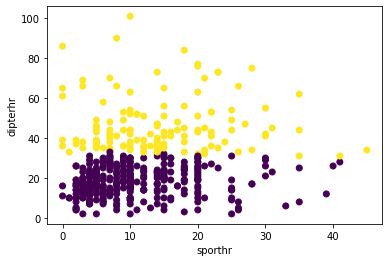

In [15]:
plt.scatter(x=X_train["SPORTHR"], y=X_train["DIOPTERHR"], c=X_train['class'])
plt.xlabel('sporthr')
plt.ylabel('dipterhr')
plt.show()

In [16]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

C:\Users\John\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


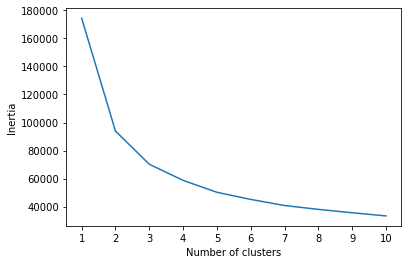

In [17]:
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=61)
    km.fit(X_train)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Elbow not in excellent definition: Best = 3

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

# <span style="color: blue;">SAMPLES</span> <span style="color: green;">BELOW</span> <span style="color: red;">HERE</span>

##### Create a logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

Fit (train) our model by using the training data

In [ ]:
# Train a Logistic Regression model print the model score
classifier.fit(X_train, y_train)

In [ ]:
# Check Confusion Matrix Totals FIX TO Corrected SET
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_predict = classifier.predict(X_test)
c_matrix = confusion_matrix(y_true, y_predict, labels=[1,0])
c_matrix

In [ ]:
tp, fn, fp, tn = c_matrix.ravel()
prec = tp / (tp + fp)
acc = tp + tn/(tp + tn + fp + fn)
sens = tp / (tp + fn)
f_one = ((prec * sens) + (prec * sens))/(prec + sens)

In [ ]:
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"---")
print(f"Precision: {prec}")
print(f"F1 Score: {f_one}")

In [ ]:
print(classification_report(y_true, y_predict))

Cognitive Check: Individual Precision and F1 Score Match the Classification Report = True

Validate the model by using the test data

In [ ]:
print(f"Model: LogisticRegression")
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

##### Create a random forest classifier model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

Fit (train) our model by using the training data

In [ ]:
# Train a Random Forest Classifier model and print the model score
def forest_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train Score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

Validate the model by using the test data

In [ ]:
forest_model(RandomForestRegressor(), data)